# TEXT PREPROCESSING

In [3]:
#import libraries
import numpy as np
import pandas as pd

!pip install Sastrawi
!pip install nltk

In [6]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
data=pd.read_csv("data_tweet.csv")
text=data['text']
text

0       banyak diskon non, yuk merapat @gopayindonesia...
1       @gojekindonesia Keterlaluan dan kuno banget in...
2       @gopayindonesia saya sudah DM tolong dibantu d...
3       @gopayindonesia tolong ya min, dana saya sudah...
4       @gopayindonesia maximum TopUp saldo gopay bera...
                              ...                        
1177    @ismissyouu @gojekindonesia @gopayindonesia @a...
1178    @gojekindonesia\r\n@gopayindonesia\r\n tiket 0...
1179    @samuelchrstns @gojekindonesia @gopayindonesia...
1180    @nainanina wes tak mention seko 7 jam lalu, te...
1181    @gopayindonesia @akhlishdiaz @gojekindonesia I...
Name: text, Length: 1182, dtype: object

In [25]:
data_link= []
for line in text:
    result = re.sub(r"http\S+"," ",line)
    data_link.append(result)

In [28]:
data_rt=[]
for line in data_link:
    result=re.sub(r"RT"," ",line)
    data_rt.append(result)

In [29]:
data_uname=[]
for line in data_rt:
    result=re.sub(r"@\s+"," ",line)
    data_uname.append(result)

In [30]:
data_line=[]
for line in data_uname:
    result=re.sub("in","",line)
    data_line.append(result)
    

In [31]:
data_num=[]
for line in data_line:
    result=re.sub("\d"," ",line)
    data_num.append(result)

In [32]:
data_hashtag=[]
for line in data_num:
    result=re.sub(r"#\S+","",line)
    data_hashtag.append(result)

In [33]:
data_emoticon=[]
for line in data_hashtag:
    result=re.sub(r'<.*?>',"",line)
    data_emoticon.append(result)

In [34]:
data_punc=[]
for line in data_emoticon:
    result=re.sub(r"[^\w\s]"," ",line)
    data_punc.append(result)

In [35]:
data_doublespace=[]
for line in data_punc:
    result=re.sub(r'\s+',' ',line)
    data_doublespace.append(result)

In [36]:
data_casef=[]
for line in data_doublespace:
    a=line.lower()
    data_casef.append(a)
data_casef

['banyak diskon non yuk merapat gopaydonesia promomakanan gojekdonesia https t co dndnj e k',
 ' gojekdonesia keterlaluan dan kuno banget i gopaydonesia narik dana saja bisa x jam kayak jaman batu aja kalian',
 ' gopaydonesia saya sudah dm tolong dibantu donk m',
 ' gopaydonesia tolong ya m dana saya sudah x jam belum masuk ke rekeng penarikan dari saldo gopay sudah saya dm barbuk',
 ' gopaydonesia maximum topup saldo gopay berapakah ya m per hari',
 'notifnya gagal eh malah rekeng ke debet ampe x gopaydonesia gojekdonesia https t co dqu chybm',
 ' gopaydonesia mau nanya dong utk belanja di alfamart menggunakan gopay sela akunnya blm prnh pake gopay di alfamart s amp k apa lagi https t co pousipz nv',
 ' gopaydonesia halo kenapa nomor laporan keluhan lama sekali diproses ',
 ' gopaydonesia trims',
 ' gojekdonesia gopaydonesia mas mbak saya mau upgrade gopay kenapa muncul tulisan kayak gi ya padahal saya belum upload dokumennya makasih https t co ty arafp l',
 ' pakajimumpung alfamart g

In [38]:
#stemming
factory=StemmerFactory()
stemmer=factory.create_stemmer()
df_stemmed=map(lambda x: stemmer.stem(x), data_casef)
data_stemmed=list(df_stemmed)

In [40]:
#stopwords
stopwords=set(stopwords.words('indonesian'))

In [41]:
stopword=open("stopword.txt").read()
stopword=set(stopword.split())
not_stopword=[]
new_stopword=set([word for word in stopword if not word in not_stopword])

In [44]:
data_stop=[]
for line in data_stemmed:
    word_token=nltk.word_tokenize(line)
    word_token=[word for word in word_token if not word in stopword]
    data_stop.append(" ".join(word_token))

In [45]:
data_stop

['diskon non yuk rapat gopaydonesia promomakanan gojekdonesia https t co dndnj e k',
 'gojekdonesia kuno banget i gopaydonesia narik dana x jam kayak jaman batu aja',
 'gopaydonesia dm tolong bantu donk m',
 'gopaydonesia tolong ya m dana x jam masuk rekeng tari saldo gopay dm barbuk',
 'gopaydonesia maximum topup saldo gopay ya m',
 'notifnya gagal eh rekeng debet ampe x gopaydonesia gojekdonesia https t co dqu chybm',
 'gopaydonesia nanya utk belanja alfamart gopay akun blm prnh pake gopay alfamart s amp k https t co pousipz nv',
 'gopaydonesia halo nomor lapor keluh proses',
 'gopaydonesia trims',
 'gojekdonesia gopaydonesia mas mbak upgrade gopay muncul tulis kayak gi ya upload dokumen makasih https t co ty arafp l',
 'pakajimumpung alfamart gopaydonesia indomaret ovo id butuh gera atm tukang parkir bt abis kl uang lg sekarat pgn atm eh atmnya rusak tp tukang parkir dpt duit kaga ngeluar iya ajimumpung',
 'danasupport n danawallet orang gak sih twitter n email gak dibales gimana be

# WORDCLOUD

In [46]:
!pip install wordcloud

In [48]:
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [49]:
a=str(data_stop)
word=re.sub(r"'","",a)

In [50]:
word

'[diskon non yuk rapat gopaydonesia promomakanan gojekdonesia https t co dndnj e k, gojekdonesia kuno banget i gopaydonesia narik dana x jam kayak jaman batu aja, gopaydonesia dm tolong bantu donk m, gopaydonesia tolong ya m dana x jam masuk rekeng tari saldo gopay dm barbuk, gopaydonesia maximum topup saldo gopay ya m, notifnya gagal eh rekeng debet ampe x gopaydonesia gojekdonesia https t co dqu chybm, gopaydonesia nanya utk belanja alfamart gopay akun blm prnh pake gopay alfamart s amp k https t co pousipz nv, gopaydonesia halo nomor lapor keluh proses, gopaydonesia trims, gojekdonesia gopaydonesia mas mbak upgrade gopay muncul tulis kayak gi ya upload dokumen makasih https t co ty arafp l, pakajimumpung alfamart gopaydonesia indomaret ovo id butuh gera atm tukang parkir bt abis kl uang lg sekarat pgn atm eh atmnya rusak tp tukang parkir dpt duit kaga ngeluar iya ajimumpung, danasupport n danawallet orang gak sih twitter n email gak dibales gimana bersag gopaydonesia n ovo id kalo b

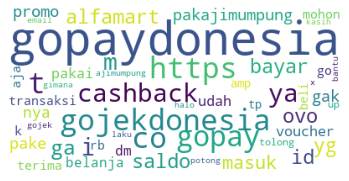

In [56]:
wordcloud=WordCloud(collocations=False,background_color='white',stopwords=stopword, max_words=50, max_font_size=200,random_state=1).generate(word)
print(wordcloud)
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [57]:
fig.savefig("wordcloud_tweet.png",dpi=900)

# TF IDF

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
vectorizer=CountVectorizer(min_df=0.02)
x=vectorizer.fit_transform(data_stop)
DTM=pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names())
DTM['kalimat_tweet']=data_stop
DTM['sum_features']=DTM.sum(axis=1)
DTM=DTM.loc[DTM['sum_features']!=0].drop(['sum_features'],axis=1)
DTM.to_csv('DTM_tweet.csv')

In [60]:
DTM

,adm,aja,ajimumpung,akun,alfamart,amp,aplikasi,banget,bantu,bayar,...,transaksi,tunggu,udah,udh,up,via,voucher,ya,yg,kalimat_tweet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diskon non yuk rapat gopaydonesia promomakanan...
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,gojekdonesia kuno banget i gopaydonesia narik ...
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,gopaydonesia dm tolong bantu donk m
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,gopaydonesia tolong ya m dana x jam masuk reke...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,gopaydonesia maximum topup saldo gopay ya m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ismissyouu gojekdonesia gopaydonesia alfamart ...
1178,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,gojekdonesia gopaydonesia tiket sya device dhi...
1179,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,samuelchrstns gojekdonesia gopaydonesia alfama...
1180,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,naana wes mention seko jam tetep ra respon wqw...


In [63]:
vectorizer=TfidfVectorizer(min_df=0.02)
vec=vectorizer.fit_transform(data_stop)
TFIDF=pd.DataFrame(vec.toarray(),columns=vectorizer.get_feature_names())
TFIDF['kalimat_tweet']=data_stop
TFIDF['sum_features']=TFIDF.sum(axis=1)
TFIDF=TFIDF.loc[TFIDF['sum_features']!=0].drop(['sum_features'],axis=1)
TFIDF.to_csv('TFIDF_tweet.csv')
TFIDF

,adm,aja,ajimumpung,akun,alfamart,amp,aplikasi,banget,bantu,bayar,...,transaksi,tunggu,udah,udh,up,via,voucher,ya,yg,kalimat_tweet
0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,diskon non yuk rapat gopaydonesia promomakanan...
1,0.0,0.489287,0.0,0.000000,0.000000,0.00000,0.0,0.592827,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,gojekdonesia kuno banget i gopaydonesia narik ...
2,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.593057,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,gopaydonesia dm tolong bantu donk m
3,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291276,0.000000,gopaydonesia tolong ya m dana x jam masuk reke...
4,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537307,0.000000,gopaydonesia maximum topup saldo gopay ya m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.0,0.000000,0.0,0.000000,0.791078,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,ismissyouu gojekdonesia gopaydonesia alfamart ...
1178,0.0,0.354167,0.0,0.411975,0.000000,0.38131,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.320019,gojekdonesia gopaydonesia tiket sya device dhi...
1179,0.0,0.000000,0.0,0.000000,0.791078,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,samuelchrstns gojekdonesia gopaydonesia alfama...
1180,0.0,0.360982,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,naana wes mention seko jam tetep ra respon wqw...
